In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# buka citra
img = cv2.imread('Lenna.png')

In [2]:
row, col, ch = img.shape

kanvas_hsv = np.zeros((row, col, 3), np.uint8)

In [3]:
# ubah citra tersebut menjadi HSV Color space.
for i in range (0, row):
  for j in range (0, col):
    b = img[i,j,0]/255
    g = img[i,j,1]/255
    r = img[i,j,2]/255

    vmax = max(r, g, b)
    vmin = min(r, g, b)
    # v
    v = vmax
    valv_min = v - vmin
    # s
    s = valv_min/v if v != 0 else 0
    # h
    if v == r :
      h = (60*(g-b))/valv_min
    elif v == g :
      h = ((120+60)*(b-r))/valv_min
    elif v == b :
      h = ((240+60)*(b-r))/valv_min
    elif r == g and g == b :
      h = 0
    h = h + 360 if h < 0 else h


    kanvas_hsv[i,j,0] = h/2
    kanvas_hsv[i,j,1] = s*255
    kanvas_hsv[i,j,2] = v*255




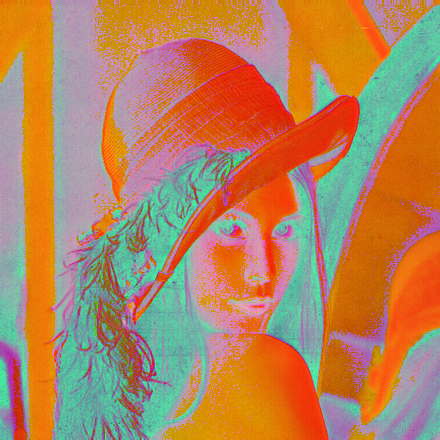

In [4]:
cv2_imshow(kanvas_hsv)

In [5]:
# split citra menggunakan fungsi cv.split
h,s,v = cv2.split(kanvas_hsv)

In [6]:
# jumlahkan setiap channel hsv menggunakan looping
total_h = 0
total_s = 0
total_v = 0
for i in range (0, row):
  for j in range (0, col):
    # h
    total_h += h[i][j]
    # s
    total_s += s[i][j]
    # v
    total_v += v[i][j]


n = col * row
# rata-rata channel h
rata_h = total_h / n
# rata-rata channel s
rata_s = total_s / n
# rata-rata channel v
rata_v = total_v / n

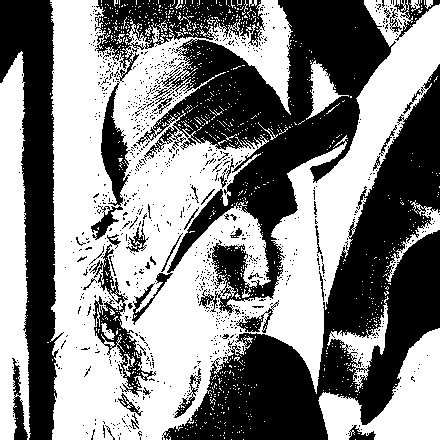

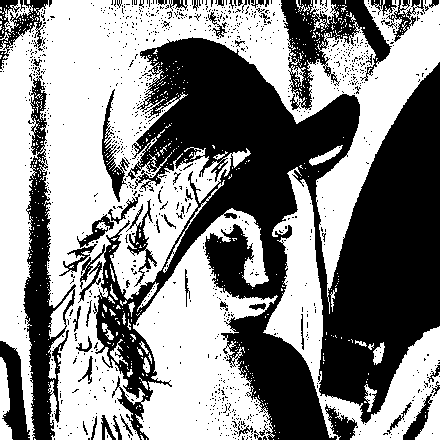

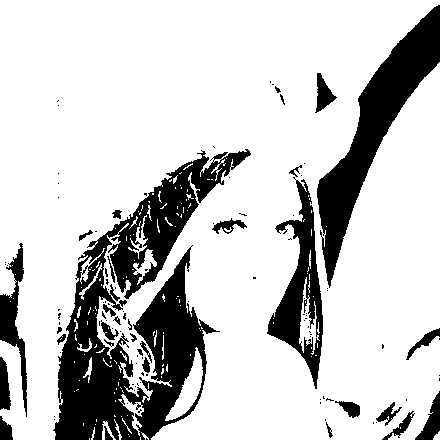

In [10]:
# lakukan thresholding manual menggunakan looping
for i in range (0, row):
  for j in range (0, col):
    # h
    if (kanvas_hsv[i,j,0] < rata_h):
      kanvas_hsv[i,j,0] = 0
    else:
      kanvas_hsv[i,j,0] = 255

    # s
    if (kanvas_hsv[i,j,1] < rata_s):
      kanvas_hsv[i,j,1] = 0
    else:
      kanvas_hsv[i,j,1] = 255

    # v
    if (kanvas_hsv[i,j,2] < rata_s):
      kanvas_hsv[i,j,2] = 0
    else:
      kanvas_hsv[i,j,2] = 255

cv2_imshow(kanvas_hsv[:,:,0])
cv2_imshow(kanvas_hsv[:,:,1])
cv2_imshow(kanvas_hsv[:,:,2])